<h2> Optisystem Optical Fiber Analysis </h2>

Note that to run a cell in this notebook do Ctrl + Enter

<h4> Obtaining the propagation delay of the fiber channel </h4>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\tomha\AppData\Local\Temp\ipykernel_20064\3496676489.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  input_pulse_data = pd.read_csv("single_pulse_data_input.txt", delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
C:\Users\tomha\AppData\Local\Temp\ipykernel_20064\3496676489.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_pulse_data = pd.read_csv("single_pulse_data_output.txt", delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()


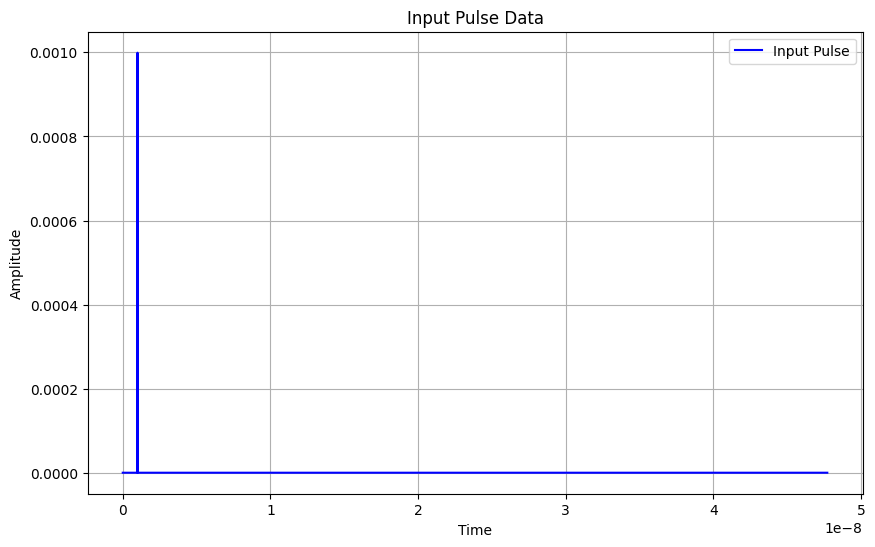

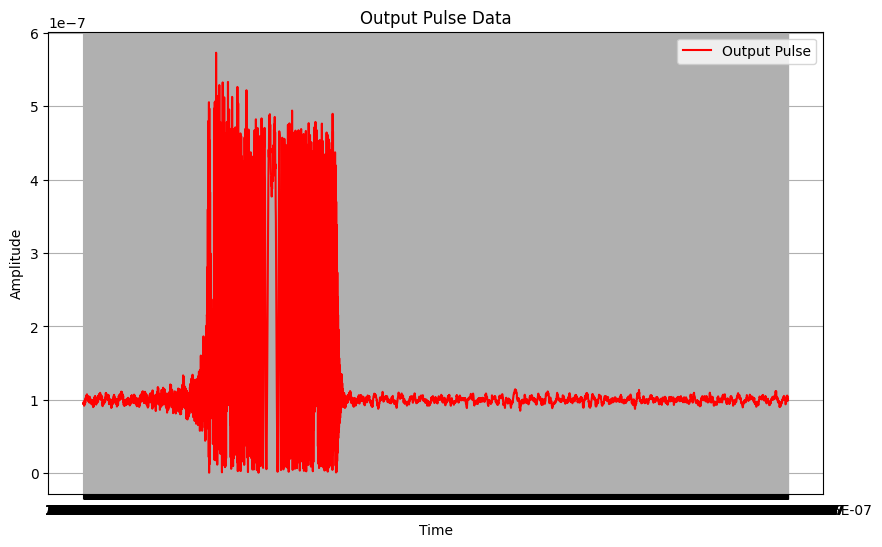

In [6]:
input_pulse_data = pd.read_csv("single_pulse_data_input.txt", delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()
output_pulse_data = pd.read_csv("single_pulse_data_output.txt", delim_whitespace=True, header=None, names=["Time", "Amplitude"]).to_numpy()

# Plot the input pulse data
plt.figure(figsize=(10, 6))
plt.plot(input_pulse_data[:, 0], input_pulse_data[:, 1], label="Input Pulse", color='b')
plt.title('Input Pulse Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Plot the output pulse data
plt.figure(figsize=(10, 6))
plt.plot(output_pulse_data[:, 0], output_pulse_data[:, 1], label="Output Pulse", color='r')
plt.title('Output Pulse Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

As we can see above, Chromatic Dispersion is taking place, as the light pulse is spread out. This makes obtaining the propagation delay difficult, as it is wavelength dependent